# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [155]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [156]:
print(f"shape of x_train:{X_train.shape} and shape of x_test:{X_test.shape}")

shape of x_train:(80, 5) and shape of x_test:(20, 5)


In [157]:
print(f"shape of y_train:{y_train.shape} and shape of y_test:{y_test.shape}")

shape of y_train:(80,) and shape of y_test:(20,)


## Visualize Dataset
This is the same code from Assignment 1

In [158]:
import matplotlib.pyplot as plt

# Your code here

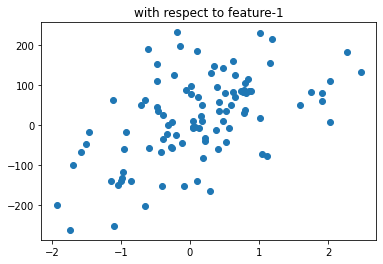

In [159]:
plt.title("with respect to feature-1")
plt.scatter(X[:,0],y)
plt.show()

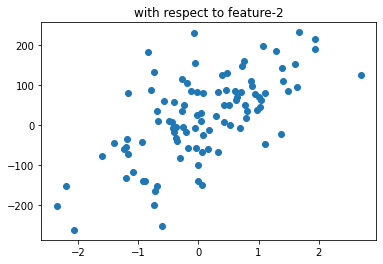

In [160]:
plt.title("with respect to feature-2")
plt.scatter(X[:,1],y)
plt.show()

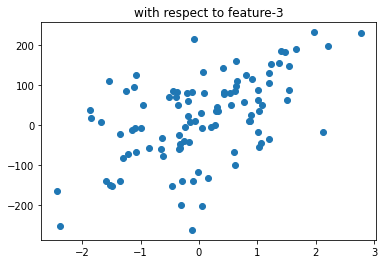

In [161]:
plt.title("with respect to feature-3")
plt.scatter(X[:,2],y)
plt.show()

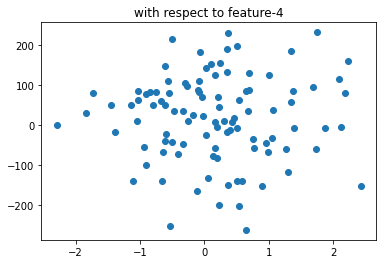

In [162]:
plt.title("with respect to feature-4")
plt.scatter(X[:,3],y)
plt.show()

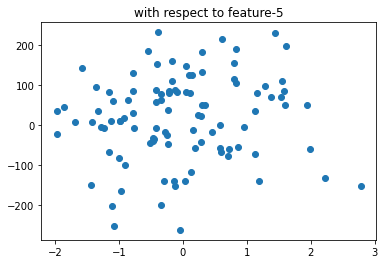

In [163]:
plt.title("with respect to feature-5")
plt.scatter(X[:,4],y)
plt.show()

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [164]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# Your code here

In [165]:
Normalizer = tf.keras.layers.Normalization(axis=-1)

In [166]:
myfirst_model = tf.keras.Sequential([
           Normalizer,
           layers.Dense(5,activation='relu'),
           layers.Dense(5,activation ='relu'),
           layers.Dense(1)                          
])

In [167]:
myfirst_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                      optimizer=tf.keras.optimizers.SGD(learning_rate=0.00001, momentum=0.0, nesterov=False))

In [168]:
myfirst_model.predict(X_train[:10])

array([[ 0.41224602],
       [ 0.35434017],
       [ 0.35464525],
       [ 0.15367697],
       [ 0.03448092],
       [-0.00578881],
       [ 0.16810761],
       [ 0.19134963],
       [ 0.00760195],
       [ 0.00427457]], dtype=float32)

In [169]:
myfirst_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_21 (Dense)            (None, 5)                 30        
                                                                 
 dense_22 (Dense)            (None, 5)                 30        
                                                                 
 dense_23 (Dense)            (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 66
Non-trainable params: 11
_________________________________________________________________


In [170]:
%%time
history = myfirst_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)


CPU times: user 28.4 s, sys: 1.17 s, total: 29.5 s
Wall time: 28.1 s


In [171]:
#history.history['val_loss'].tail()

## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

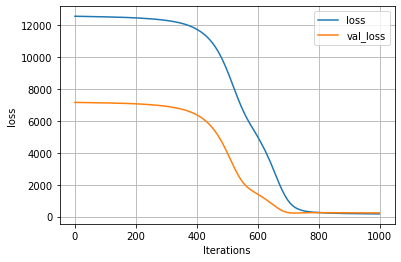

In [172]:
y = history.history['loss']
z = history.history['val_loss']
plt.plot(y,label="loss")
plt.plot(z,label="val_loss")
plt.ylabel("loss")
plt.xlabel("Iterations")
plt.legend()
plt.grid(True)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [173]:
predictions = myfirst_model.predict(X_test)

In [174]:
predictions[:10]

array([[ 169.80963 ],
       [-123.10898 ],
       [  72.374344],
       [-138.44054 ],
       [   3.518202],
       [ -77.10021 ],
       [  63.527916],
       [  42.232426],
       [-141.25687 ],
       [ 142.64418 ]], dtype=float32)

In [175]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score

accu = r2_score(y_test,predictions)
print(accu)

0.9661276597383492


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

Generating the dataset here(number of samples is 1000):-

In [1]:
# Your code here
from sklearn import datasets
from sklearn.model_selection import train_test_split


X, y = datasets.make_regression(n_samples=1000, n_features=5, noise=5, random_state=4)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [2]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(800, 5) (200, 5)
(800,) (200,)


Importing the libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
Normalizer = tf.keras.layers.Normalization(axis=-1)

Model here,
tried using the 'tanh' activation function.

In [6]:
custom_model = tf.keras.Sequential([
      Normalizer,
      layers.Dense(4,activation="tanh"),
      layers.Dense(6,activation="tanh"),
      layers.Dense(1)                              
])

Tried using the Adam optimizer here

In [7]:
custom_model.compile(
    loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(learning_rate=0.04)
)

training the Model goes here

In [8]:
%%time
history = custom_model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=130)

CPU times: user 7.64 s, sys: 468 ms, total: 8.11 s
Wall time: 8.08 s


Plot Loss

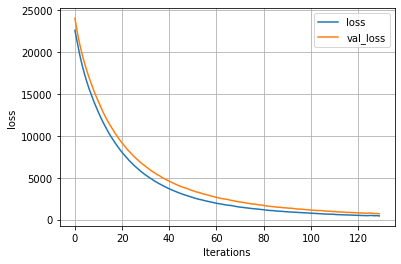

In [9]:
y = history.history['loss']
z = history.history['val_loss']
plt.plot(y,label="loss")
plt.plot(z,label="val_loss")
plt.ylabel("loss")
plt.xlabel("Iterations")
plt.legend()
plt.grid(True)

Accuracy:-

In [11]:
predictions = custom_model.predict(X_test)
from sklearn.metrics import r2_score

accu = r2_score(y_test,predictions)
print("Accuracy:",accu)

Accuracy: 0.9761308831585002
